In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0d839b03-ac36-4a2e-8eee-7cb07b9e6761',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  current = pd.DataFrame(data['data'])
  print(current.head)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


<bound method NDFrame.head of          id                 name symbol                slug  num_market_pairs  \
0         1              Bitcoin    BTC             bitcoin             11041   
1      1027             Ethereum    ETH            ethereum              8911   
2       825          Tether USDt   USDT              tether             85106   
3      1839                  BNB    BNB                 bnb              2155   
4      5426               Solana    SOL              solana               657   
...     ...                  ...    ...                 ...               ...   
4995   2573       Electrify.Asia   ELEC       electrifyasia                 6   
4996  30409  NeverSurrenderOne's    NSO  neversurrenderones                 4   
4997  18056                 ZONE   ZONE                zone                 8   
4998  24595           Jaypeggers    JAY          jaypeggers                 5   
4999   7242       cVault.finance   CORE      cvault-finance                11  

In [9]:
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')
market_cap_raw = dec6[['id', 'market_cap_usd']]

market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [10]:
cap = market_cap_raw.query('market_cap_usd > 0')
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

Text(0, 0.5, '% of total cap')

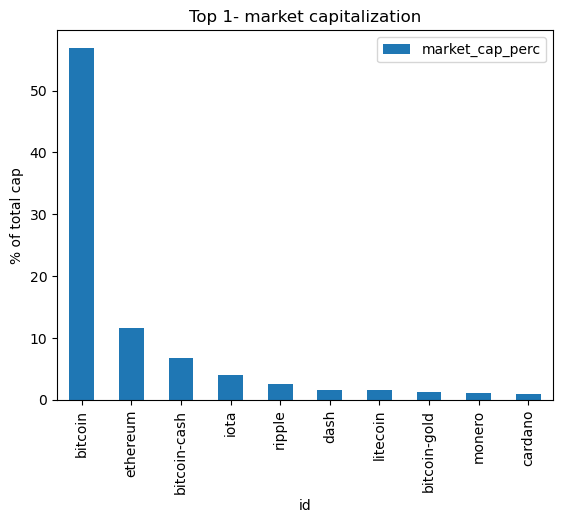

In [14]:
TOP_CAP_TITLE = "Top 1- market capitalization"
TOP_CAP_YLABEL = '% of total cap'

cap10 = cap.head(10).set_index(cap.id[:10])

cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

ax = cap10.plot.bar(x = 'id', y = 'market_cap_perc', title = TOP_CAP_TITLE)

ax.set_ylabel(TOP_CAP_YLABEL)

Text(0.5, 0, '')

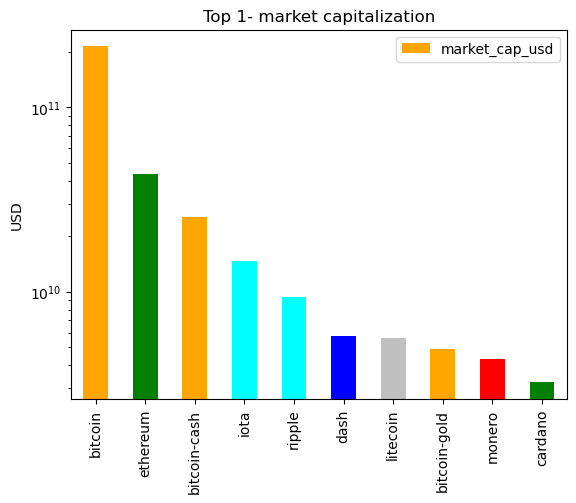

In [15]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

ax = cap10.plot.bar(x = 'id', y = 'market_cap_usd', logy = True, color = COLORS, title = TOP_CAP_TITLE)

ax.set_ylabel('USD')

ax.set_xlabel('')

In [18]:
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

volatility = volatility.set_index('id').dropna()

volatility = volatility.sort_values('percent_change_24h', ascending = True)

volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


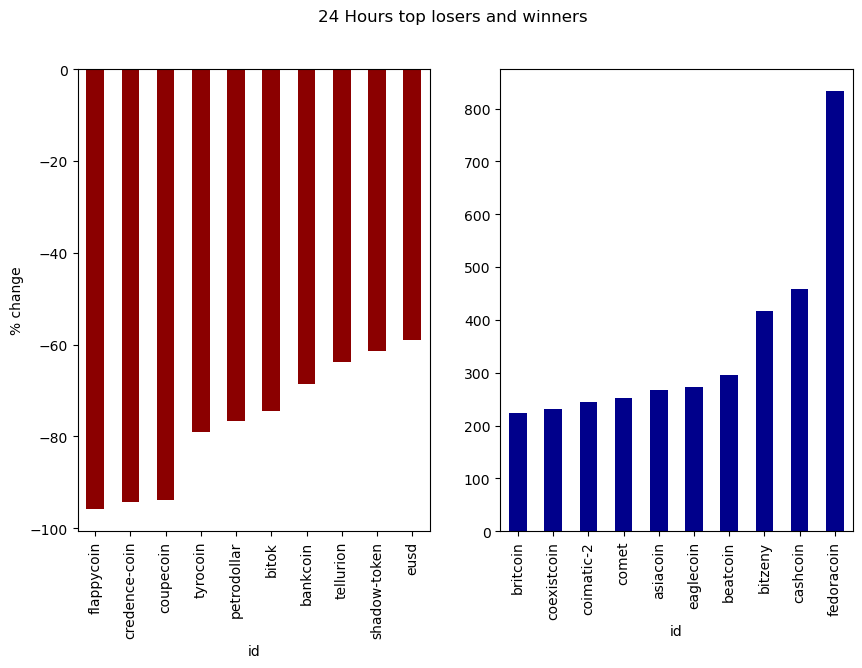

In [29]:
def top10_subplot(volatility_series, title):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))

    ax = (volatility_series[:10].plot.bar(color = 'darkred', ax = axes[0]))
    fig.suptitle(title)
    ax.set_ylabel('% change')
    ax = (volatility_series[-10:].plot.bar(color = 'darkblue', ax = axes[1]))
    
    return fig, ax

DTITLE = "24 Hours top losers and winners"

fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

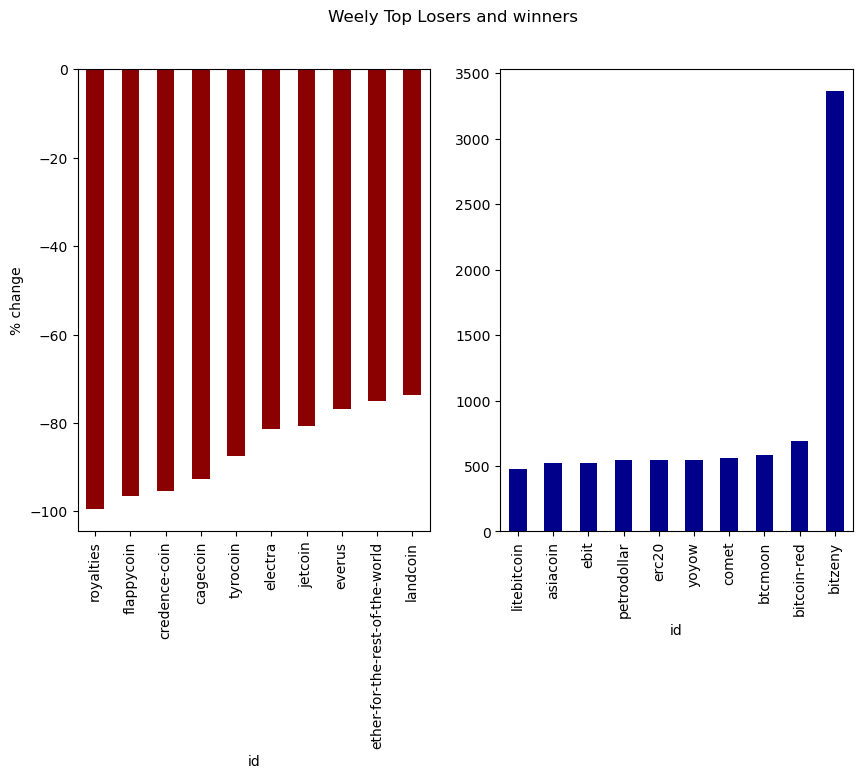

In [32]:
volatility7d = volatility.sort_values('percent_change_7d', ascending = True)

WTITLE = 'Weely Top Losers and winners'

fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

In [34]:
largecaps = cap.query('market_cap_usd > 10000000000')

largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


<BarContainer object of 3 artists>

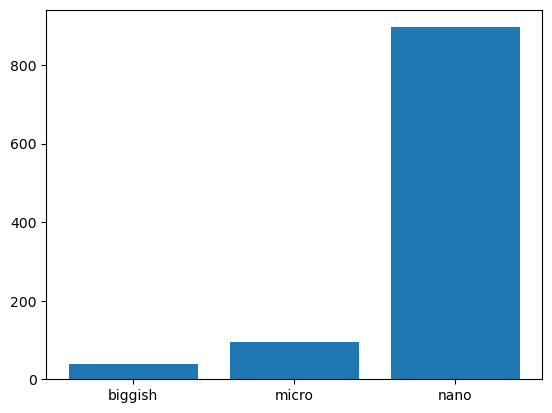

In [35]:
def capcount(query_string):
    return cap.query(query_string).count().id

LABELS = ['biggish', "micro", 'nano']

biggish = capcount('market_cap_usd > 300000000')
micro = capcount('market_cap_usd > 50000000 & market_cap_usd < 300000000')
nano =  capcount('market_cap_usd < 50000000')

values = (biggish, micro, nano)

plt.bar(range(len(values)), values, tick_label = LABELS)